### farshidhesami@gmail.com

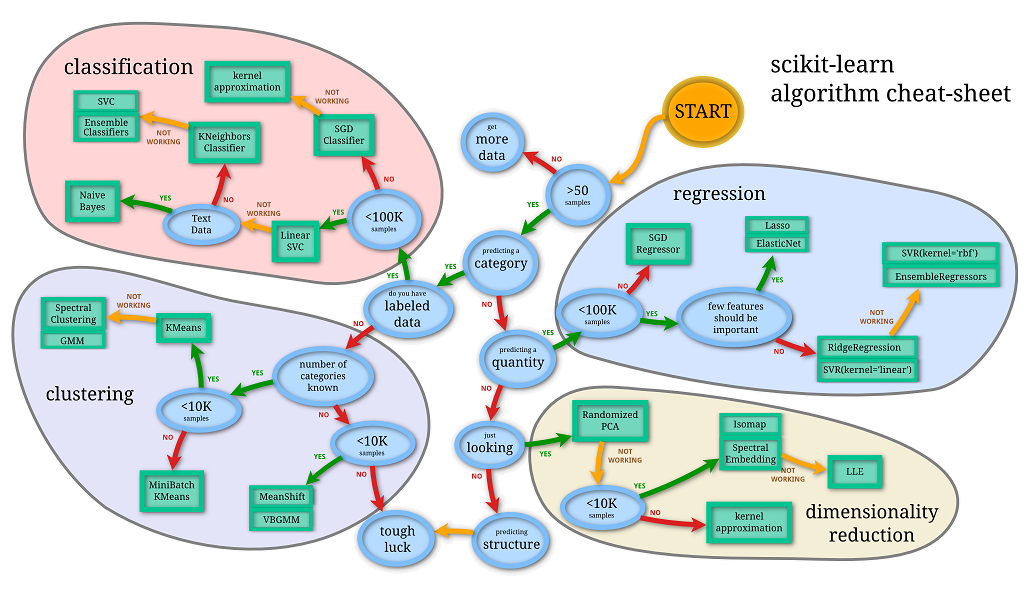

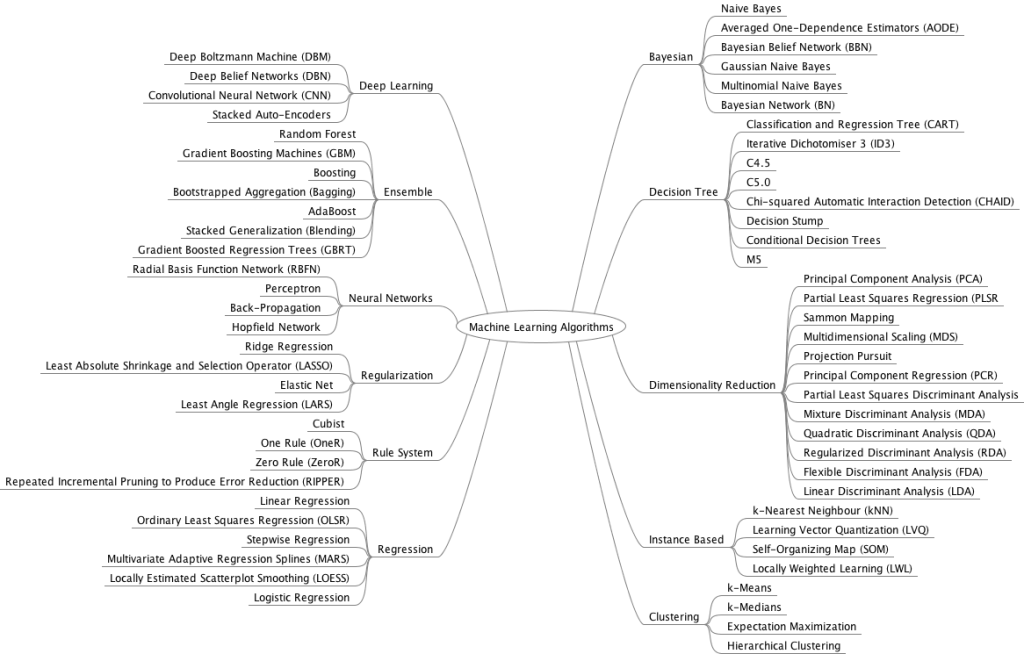


### How write a code ?

- 1. Reads the data from the 'Temperatures.csv' file using pandas.
- 2. Selects the target variable.
- 3. Defines a function to generate flowcharts for different attributes.
- 4. Calls the function to generate flowcharts for the 'Outlook', 'Temperature', 'Humidity', and 'Wind' attributes.
- 5. Determines the best day predicted to be good for playing tennis using each decision tree classifier.
- 6. Performs cross-validation to evaluate the decision tree models.
- 7. Prints the cross-validation scores for each attribute.


### import cross_val_score into the code :

#### criterion='entropy'

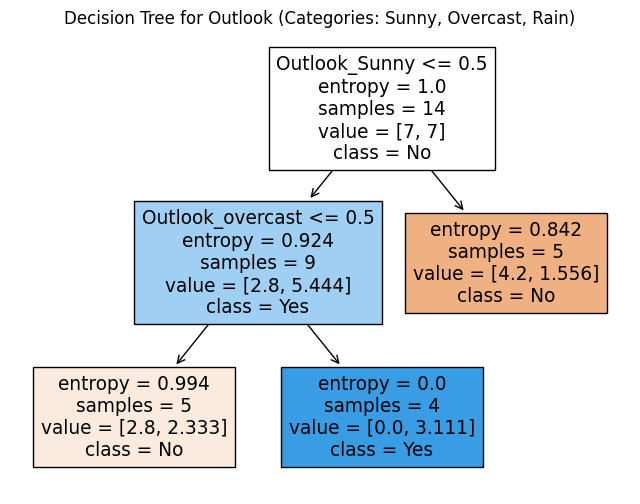

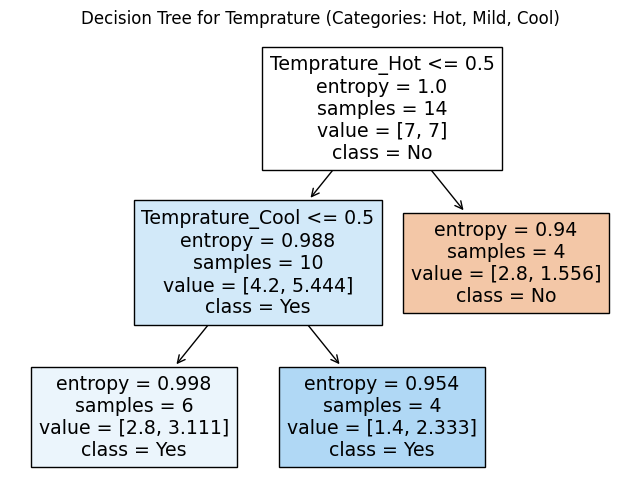

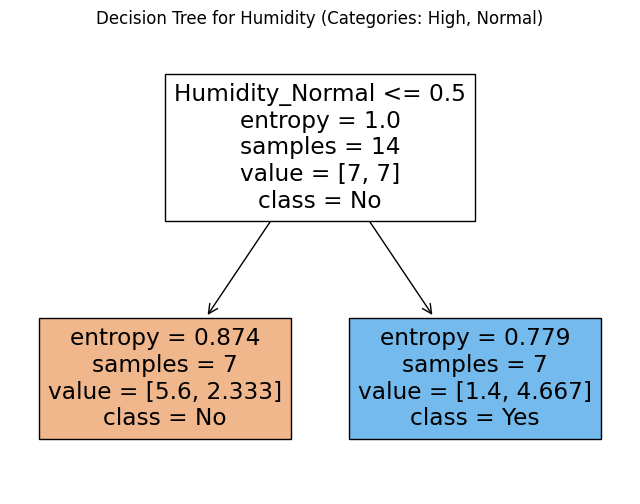

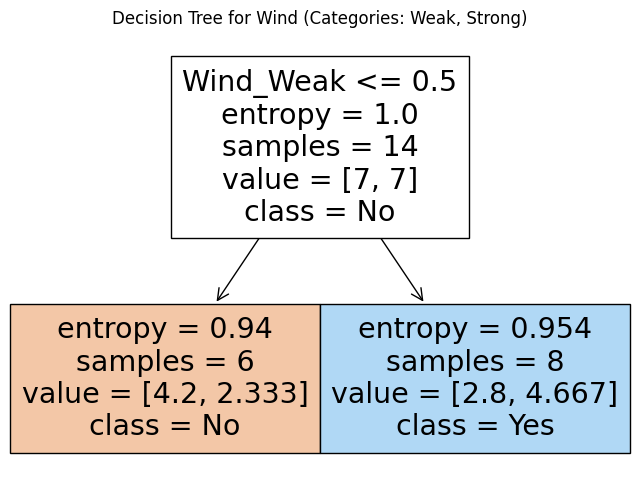

Best day predicted to be good for playing tennis: D1
Best day predicted to be good for playing tennis (Temprature): D4
Best day predicted to be good for playing tennis (Humidity): D5
Best day predicted to be good for playing tennis (Wind): D1
Cross-validation scores (Outlook): [0.66666667 0.66666667 0.33333333 0.66666667 0.5       ]
Cross-validation scores (Temprature): [0.33333333 0.         0.33333333 0.66666667 0.        ]
Cross-validation scores (Humidity): [0.33333333 1.         0.66666667 0.66666667 1.        ]
Cross-validation scores (Wind): [0.66666667 0.66666667 1.         0.         1.        ]


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Specify the file path
file_path = 'training_course/Temperatures.csv'

# Read the CSV file using pd.DataFrame()
data = pd.read_csv(file_path)

# Select the target variable
y = data['Play_tennis']

# Define a function to generate a flowchart for an attribute  or add  ## criterion='entropy'
def generate_flowchart(attribute, categories, criterion='entropy'):  
    # Select the attribute for analysis
    X = data[[attribute]]

    # Convert categorical variables into numerical representations using one-hot encoding
    X_encoded = pd.get_dummies(X)
    
    # Create an instance of the DecisionTreeClassifier and set the parameters
    clf = DecisionTreeClassifier(criterion=criterion, class_weight='balanced', max_features='sqrt', max_depth=5, min_samples_split=2, min_samples_leaf=1)
    
    # Fit the model to the data
    clf.fit(X_encoded, y)

    # Generate a simplified flowchart representation for the decision tree
    fig, ax = plt.subplots(figsize=(8, 6))
    tree.plot_tree(clf, feature_names=X_encoded.columns, class_names=clf.classes_, filled=True, ax=ax)
    plt.title(f"Decision Tree for {attribute} (Categories: {', '.join(categories)})")
    plt.show()

    # Return the trained classifier and encoded attribute
    return clf, X_encoded

# Generate a flowchart for the Outlook attribute with 3 categories
outlook_categories = ['Sunny', 'Overcast', 'Rain']
outlook_clf, outlook_X_encoded = generate_flowchart('Outlook', outlook_categories, criterion='entropy')

# Generate a flowchart for the Temprature attribute with 3 categories
temperature_categories = ['Hot', 'Mild', 'Cool']
temperature_clf, temperature_X_encoded = generate_flowchart('Temprature', temperature_categories, criterion='entropy')

# Generate a flowchart for the Humidity attribute with 2 categories
humidity_categories = ['High', 'Normal']
humidity_clf, humidity_X_encoded = generate_flowchart('Humidity', humidity_categories, criterion='entropy')

# Generate a flowchart for the Wind attribute with 2 categories
wind_categories = ['Weak', 'Strong']
wind_clf, wind_X_encoded = generate_flowchart('Wind', wind_categories, criterion='entropy')

# Determine the best day predicted to be good for playing tennis using the Wind classifier
best_day = data.loc[wind_clf.predict(wind_X_encoded) == 'Yes', 'Day'].values[0]
print("Best day predicted to be good for playing tennis:", best_day)

# Determine the best day predicted to be good for playing tennis using the Temprature decision tree
best_day_temperature = data.loc[temperature_clf.predict(temperature_X_encoded) == 'Yes', 'Day'].values[0]
print("Best day predicted to be good for playing tennis (Temprature):", best_day_temperature)

# Determine the best day predicted to be good for playing tennis using the Humidity decision tree
best_day_humidity = data.loc[humidity_clf.predict(humidity_X_encoded) == 'Yes', 'Day'].values[0]
print("Best day predicted to be good for playing tennis (Humidity):", best_day_humidity)

# Determine the best day predicted to be good for playing tennis using the Wind decision tree
best_day_wind = data.loc[wind_clf.predict(wind_X_encoded) == 'Yes', 'Day'].values[0]
print("Best day predicted to be good for playing tennis (Wind):", best_day_wind)

# Perform cross-validation to evaluate the decision tree models
cv_scores_outlook = cross_val_score(outlook_clf, outlook_X_encoded, y, cv=5)
cv_scores_temperature = cross_val_score(temperature_clf, temperature_X_encoded, y, cv=5)
cv_scores_humidity = cross_val_score(humidity_clf, humidity_X_encoded, y, cv=5)
cv_scores_wind = cross_val_score(wind_clf, wind_X_encoded, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores (Outlook):", cv_scores_outlook)
print("Cross-validation scores (Temprature):", cv_scores_temperature)
print("Cross-validation scores (Humidity):", cv_scores_humidity)
print("Cross-validation scores (Wind):", cv_scores_wind)


## "split" in a decision tree :

- The "split" in a decision tree refers to the process of dividing the data into two or more homogeneous subsets based on a particular feature and a threshold value. 
- This division helps in creating branches or sub-trees in the decision tree structure.
- The split operation is an essential step in the decision tree algorithm, as it determines how the data is partitioned at each node of the tree. 
- The goal is to find the best split that : 
   - Maximizes the separation of classes (in classification) 
   - Minimizes the impurity or variance (in regression) within each resulting subset.

- The scikit-learn decision tree algorithm uses various splitting criteria to evaluate and select the best feature and threshold for the split. 
- Two commonly used splitting criteria are :
   - Gini impurity. 
   - information gain (based on entropy).


### 1. Gini impurity: 
 - It measures the probability of incorrectly classifying a randomly chosen element from the dataset if it were randomly labeled according to the class distribution in the subset. The Gini impurity ranges from 0 (pure node) to 1 (impure node). The split with the lowest Gini impurity is preferred.

### 2. Information gain: 
- It calculates the reduction in entropy (or average information) achieved by splitting the data based on a particular feature. Entropy measures the impurity or disorder in a set of samples. The split with the highest information gain is chosen.

- To determine the Best split, scikit-learn evaluates the splitting criteria for all possible features and thresholds and selects the one that optimizes the criterion. 

- The algorithm considers different splitting strategies,depending on the type of feature (continuous or categorical) and the algorithm variant. such as:
   - Binary splits 
   - Multiway splits, 

Once the split is determined, the data is divided into two subsets based on the:
 - selected feature 
 - Threshold value. 

- The process then recursively continues for each resulting subset until certain stopping criteria are met, such as reaching :
  - Maximum depth
  - Minimum number of samples per leaf
  - Minimum improvement in impurity.


### The sklearn.tree.DecisionTreeClassifier class in scikit-learn has various :

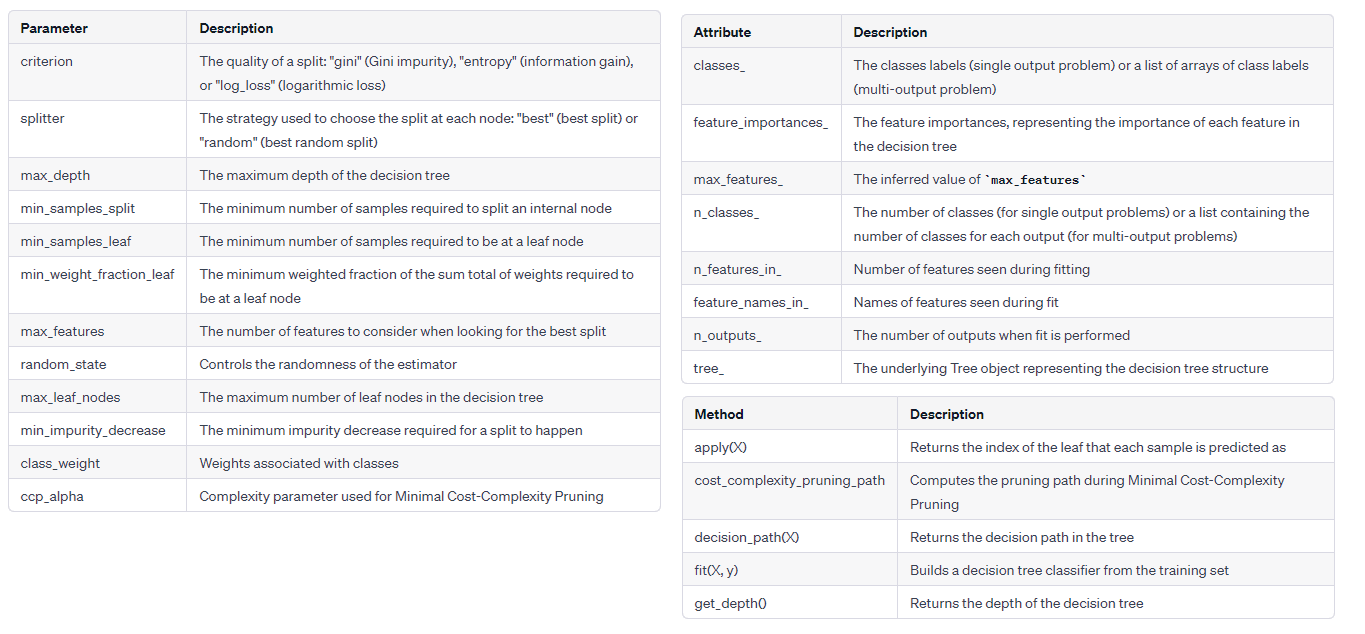

### The `criterion` parameter :
- in the `DecisionTreeClassifier` class determines the quality of a split in a decision tree.

### There are 3 supported options for the `criterion` parameter:

- 1. **"gini"**: 
    - This criterion uses Gini impurity as the measure of impurity or the degree of class impurity at a node. Gini impurity ranges from 0 to 1, where 0 represents a pure node (all samples belong to the same class), and 1 represents an impure node (samples are evenly distributed across classes). 
- 2. **"entropy"**: 
    - This criterion uses information gain based on entropy as the measure of impurity. Entropy is a statistical measure of disorder or uncertainty in a set of samples. It ranges from 0 to infinity, where 0 represents a pure node, and higher values indicate higher impurity. The information gain is calculated as the reduction in entropy achieved by splitting the data based on a particular feature.
- 3. **"log_loss"**: 
   - This criterion uses logarithmic loss, also known as cross-entropy, as the measure of impurity. Logarithmic loss is commonly used in binary classification tasks. It measures the performance of a probabilistic classifier by comparing the predicted probabilities to the true class labels. Logarithmic loss ranges from 0 to infinity, where lower values indicate better predictions.

### There are 2 options for the `splitter` parameter:

### 1 - best : 

- This is the default value for the `splitter` parameter. It uses a "best" strategy to select the feature that results in the most optimal split. The "best" strategy evaluates all possible splits and chooses the one that maximizes a particular criterion (e.g., Gini impurity, entropy, or logarithmic loss, depending on the `criterion` parameter). This strategy generally leads to a more accurate but potentially deeper and more computationally expensive tree.

### 2 - random:

- This option uses a "random" strategy to select the feature for splitting. Instead of evaluating all features and selecting the best one, it randomly selects a subset of features and chooses the best split from that subset. 
- The number of features considered at each split is controlled by the `max_features` parameter. 
- This strategy can be useful when dealing with high-dimensional datasets, as it can reduce the computational cost of building the tree. However, it may result in slightly lower accuracy compared to the "best" strategy.

- The choice of `splitter` depends on the specific requirements of your problem. 
- The "best" splitter is generally recommended when you have a relatively small number of features and want to achieve the best possible accuracy. 
- On the other hand, if you have a large number of features or if computational efficiency is a concern, you can use the "random" splitter and adjust the `max_features` parameter accordingly.

### The `max_depth` parameter :
 -  the maximum depth or the maximum number of levels that the decision tree can grow.

- A decision tree grows by recursively splitting nodes based on features until a stopping criterion is met, which can be the maximum depth reached, the minimum number of samples required to split a node, or other criteria.

### Here's an explanation of the `max_depth` parameter:

#### max_depth=None: 
- The default value of `max_depth` is `None`, which means there is no maximum depth limit for the tree. The tree will keep growing and splitting until all leaves are pure (contain only samples of one class) or until all nodes contain fewer samples than the minimum required to split (controlled by the `min_samples_split` parameter), or until another stopping criterion is met. 

- This can lead to overfitting if the tree becomes too deep and captures noise or irrelevant patterns in the training data.

#### max_depth=int: 
- You can specify an integer value for `max_depth` to limit the depth of the decision tree. 
- For example, setting `max_depth=3` means that the tree can have a maximum depth of 3 levels. When the specified `max_depth` is reached, the tree stops growing and no further splits are performed.

- Limiting the depth of the tree can help prevent " overfitting ", simplify the model, and improve generalization to unseen data. 
- However, setting a very small `max_depth` may result in an " underfitting model "  that fails to capture complex patterns in the data.

- It's important to find an appropriate value for `max_depth` that balances between model complexity and generalization. 

#### This value can be determined using techniques like:

-	Cross-validation.
-	Grid search.

#### By tuning the `max_depth` parameter, you can control the trade-off between:

-	model simplicity. 
-	model  accuracy.


### The `min_samples_split` parameter:

- Minimum number of samples required to split an internal node. It determines whether a node should be further split based on the number of samples it contains.

#### Min_samples_split=int : 
- When an integer value is provided, such as `min_samples_split=2`, the decision tree requires at least that many samples in a node to be eligible for further splitting. 
- If the number of samples in a node is less than `min_samples_split`, the node becomes a leaf node, and no further splitting is performed. 
T- his helps prevent the tree from continuing to split nodes with very few samples, which can lead to “ overfitting “. 
- Increasing the value of `min_samples_split` can result in a simpler model with “ less complexity “.

#### Min_samples_split=float : 
- Alternatively, you can specify a float value between 0 and 1, such as `min_samples_split=0.5`. 
- In this case, the value represents a proportion of the total number of samples. 
- For example, if `min_samples_split=0.5` and a node has 100 samples, the node must have at least 50 samples to be eligible for further splitting. 
- Using a float value allows you to set a minimum threshold based on the proportion of samples rather than a fixed number. 
- This can be useful when dealing with large datasets where the absolute number of samples may vary.

- Setting an appropriate value for `min_samples_split` is important to control the growth of the decision tree and prevent overfitting. 
- A smaller value allows the tree to capture finer details and potentially leads to “ overfitting “, 
- while a larger value promotes generalization but may result in “ underfitting ” if the data contains complex patterns.


### The `min_samples_leaf` :

- Specifies the minimum number of samples required to be present in a leaf node. It determines the minimum size of the leaf nodes in the decision tree.

- Here's an explanation of the `min_samples_leaf` parameter:

#### Min_samples_leaf=int: 

- When an integer value is provided, such as `min_samples_leaf=1`, the decision tree will create leaf nodes as long as they contain at least the specified number of samples. 
- If a potential split results in a leaf node with fewer samples than `min_samples_leaf`, the split is not performed, and the node becomes a leaf node. 
- This helps prevent the tree from creating leaf nodes with very few samples, which can lead to overfitting. 
- Increasing the value of `min_samples_leaf` can result in a simpler model with less complexity.

#### Min_samples_leaf=float:

- Alternatively, you can specify a float value between 0 and 1, such as `min_samples_leaf=0.5`. 
- In this case, the value represents a proportion of the total number of samples. 
- For example, if `min_samples_leaf=0.5` and a potential split results in a leaf node with 100 samples, the split will not be performed if the leaf node would contain fewer than 50 samples. 



### The `min_weight_fraction_leaf` :

- specifies the minimum weighted fraction of the total number of samples required to be present in a leaf node. 

- Here's an explanation of the `min_weight_fraction_leaf` parameter:

#### min_weight_fraction_leaf=float:

- This parameter takes a float value between 0 and 1, such as `min_weight_fraction_leaf=0.1`. 
- The value represents the minimum weighted fraction of the total number of samples required to be present in a leaf node. 

- The weight of each sample is determined by the `sample_weight` parameter passed to the `fit` method of the classifier.
- The weighted fraction is calculated as the sum of the weights of the samples in a leaf node divided by the sum of all the sample weights.

- The purpose of `min_weight_fraction_leaf` is similar to `min_samples_leaf`, but it allows you to specify the minimum fraction of weighted samples required in a leaf node instead of an absolute number. 

